## Processed Food Scenario Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bnlearn as bn
from pyvis.network import Network
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph


In [10]:

path2 = '/Users/jerzybala/Desktop/data_causal_all_UPF_Age_18-24 and Anglosaxon_behavior_change.csv'

data_source = pd.read_csv(path2, index_col=None)
data_source= data_source.drop('Unnamed: 0', axis=1)
#data_source.columns.tolist()
data_source.shape


(30779, 76)

## Modeling Scenario Selection

In [11]:
print(len(data_source))
data = data_source.sample(frac=1.0,random_state=42)
print(len(data))


30779
30779



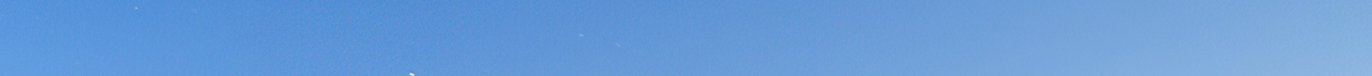


In [12]:
import bnlearn as bn

model = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')
G = bn.plot(model, interactive=True)
G = model['model']


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 66
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpp8ifsqhl/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpp8ifsqhl/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 66
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmp19e1cp_a/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmp19e1cp_a/bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


In [13]:
# Compute edge strength with chi square test
import pandas as pd
from tabulate import tabulate


model = bn.independence_test(model, data, test='chi_square')

# Show the results of the independence test

in_test = model['independence_test']

in_test_pd = pd.DataFrame(in_test)

# Write to an Excel file
excel_file_path = '/Users/jerzybala/Desktop/Causal Models/independence_test_results_angl_afterchnage.xlsx'
in_test_pd.to_excel(excel_file_path, index=False)



[bnlearn] >Compute edge strength with [chi_square]


In [ ]:

# Convert networkx graph to pyvis network
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("tmp.html")

In [ ]:
# Create a layout for our nodes 
layout = nx.spring_layout(G, k=1)
#layout = nx.kamada_kawai_layout(G)
#layout = nx.fruchterman_reingold_layout(G, k=1, dim=2, iterations=200)
#layout = nx.shell_layout(G)
#layout = nx.circular_layout(G)
#layout = nx.random_layout(G)

## Main Graph Visualization

In [ ]:
from pyvis.network import Network
import gravis as gv
import networkx as nx
from matplotlib.pyplot import figure

# Your code to create and populate the networkx graph G
# ...

figure(figsize=(15,20))

g = Network(cdn_resources="in_line", notebook=True, width='2000px', height='1500px')
g.toggle_physics(True)

# Add nodes from G to the pyvis network
for node in G.nodes():
    g.add_node(node, label=str(node))

# Add edges with specific width
edge_width = 10  # Set your desired edge width here
for edge in G.edges():
    g.add_edge(edge[0], edge[1], width=edge_width)


g.toggle_hide_edges_on_drag(True)
g.force_atlas_2based()
g.from_nx(G)


g.set_options("""
var options = {
  "physics": {
      "barnesHut": {
      
          "springLength": 650,
          "springConstant": 0.05,
          "damping": 0.1
      
      },

      "repulsion": {
      
          "nodeDistance": 1650,
          "springLenght": 550,
          "springConstant": 0.01
      
      },
   
      
      "maxVelocity": 200,
      "minVelocity": 0.1,

    
    "solver": "repulsion"

  },
  "nodes": {
    "borderWidth": 30,
    "borderWidthSelected": null,
    "opacity": null,
    "font": {
      "size": 80,
      "face": "verdana"
    },
    "size": 20
  },
  "edges": {
  
    "width": 60,
    "arrows": {
      "to": { "enabled": true, "scaleFactor": 4.0 }
    },
    "color": {
      "color": "#848484",
      "highlight": "#848484",
      "hover": "#848484",
      "inherit": "from",
      "opacity": 1.0
    },
    "smooth": true
  }
}
""")



g.show("graph.html")




In [ ]:
import gravis as gv
import networkx as nx

g = nx.cycle_graph(10)
g.graph['node_color'] = 'blue'
g.nodes[1]['title'] = 'Number 1'
g.nodes[1]['group'] = 1
g.nodes[3]['title'] = 'I belong to a different group!'
g.nodes[3]['group'] = 10
g.nodes[3]['color'] = 'orange'
g.add_node(20, size=20, title='couple', group=2, color='red')
g.add_node(21, size=15, title='couple', group=2, color='red')
g.add_edge(20, 21, weight=5)
g.add_node(25, size=25, label='lonely', title='lonely node', group=3, color='green')

gv.d3(g)

In [ ]:
import gravis as gv
import networkx as nx

g = nx.cycle_graph(10)
g.graph['node_color'] = 'blue'
g.nodes[1]['title'] = 'Number 1'
g.nodes[1]['group'] = 1
g.nodes[3]['title'] = 'I belong to a different group!'
g.nodes[3]['group'] = 10
g.nodes[3]['color'] = 'orange'
g.add_node(20, size=20, title='couple', group=2, color='red')
g.add_node(21, size=15, title='couple', group=2, color='red')
g.add_edge(20, 21, weight=5)
g.add_node(25, size=25, label='lonely', title='lonely node', group=3, color='green')

gv.d3(g)

## G Pruned Versions

In [57]:
edges_to_keep = [
    ("Processed food in diet_Several days a week", "Processed food in diet_A few times a month"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_Many times in a day"),
    ("Processed food in diet_A few times a week", "Processed food in diet_A few times in a day"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_Several days a week"),
    ("Processed food in diet_A few times in a day", "Processed food in diet_A few times a month"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_A few times in a day"),
    ("Frequency of Socializing_1-3 times a month", "Processed food in diet_A few times a week"),
    ("Age_18", "Processed food in diet_Several days a week"),
    ("Processed food in diet_Several times a day", "Processed food in diet_Once a day"),
    ("Prolonged or sustained bullying in person from peers", "Processed food in diet_Once a day"),
    ("Frequency of doing exercise_Some days of the week", "Processed food in diet_Many times in a day"),
    ("Frequency of getting a good nights sleep_Hardly ever", "Processed food in diet_Several times a day"),
    ("Age_18", "Processed food in diet_Several times a day"),
    ("Age_18-24", "Processed food in diet_A few times a week"),
    ("Alcoholic beverages", "Processed food in diet_Rarely/Never"),
    ("Age_18-24", "Processed food in diet_Several times a day"),
    ("Age_18", "Processed food in diet_Rarely/Never"),
    ("Age_21-24", "Processed food in diet_Rarely/Never"),
    ("Age_25-34", "Processed food in diet_Rarely/Never"),
    ("Processed food in diet_Several times a day", "Processed food in diet_A few times a week"),
    ("Age_18-24", "Processed food in diet_Rarely/Never"),
    ("Processed food in diet_A few times a week", "Processed food in diet_Once a day"),
    ("Processed food in diet_Several times a day", "Processed food in diet_A few times a month"),
    ("Processed food in diet_Once a day", "Processed food in diet_A few times a month"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_Several times a day"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_Once a day"),
    ("Processed food in diet_A few times a week", "Processed food in diet_A few times a month"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_A few times a week"),
    ("Processed food in diet_Rarely/Never", "Processed food in diet_A few times a month"),
]


In [59]:
# Find the edges that are not in the 'edges_to_keep' list
edges_to_remove = [edge for edge in model['model'].edges() if edge not in edges_to_keep]

# Remove the edges from the model
for edge in edges_to_remove:
    model['model'].remove_edge(*edge)

# Now you can plot the pruned graph
G_pruned = bn.plot(model, interactive=True)



[d3blocks] >INFO> Cleaning edge_properties and config parameters..


[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 68
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpaoud9dzn/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpaoud9dzn/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 68
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpbuehtill/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpbuehtill/bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.


In [64]:
# Now you can plot the pruned graph
G_pruned = bn.plot(model, interactive=True)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Number of unique nodes: 68
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpiakezxh7/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpiakezxh7/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 68
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmp3dtznjeo/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmp3dtznjeo/bnlearn_Directed_Acyclic_Graph_(DAG).html]
